In [2]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

# 生成数据集

In [3]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

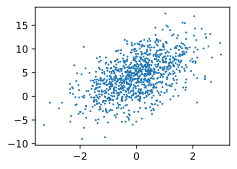

In [4]:
from d2lzh_pytorch import *


set_figsize()
plt.scatter(features[:, 0], labels[:], 1)
plt.show()

# 读取数据

In [5]:
import torch.utils.data as Data

batch_size = 10
dataset = Data.TensorDataset(features, labels)  # 将训练数据特征与标签组合
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)  # 从dataset中读取batch_size个数据，并且打乱顺序

print(data_iter)

In [6]:
for X, y in data_iter:
    print(X, y)
    break

tensor([[ 0.9220,  0.8908],
        [-0.1201,  0.7876],
        [-0.2135, -0.4202],
        [-1.3814,  2.0841],
        [-3.2768,  1.0895],
        [ 0.7463,  1.3459],
        [-0.1653, -1.7379],
        [ 0.1332,  1.3329],
        [-0.1096,  1.0808],
        [ 0.1544,  0.4608]]) tensor([ 3.0089,  1.2895,  5.1907, -5.6426, -6.0635,  1.1220,  9.7897, -0.0609,
         0.3117,  2.9487])


# 定义模型

In [12]:
import torch.nn as nn
# nn -> neural network 定义了大量神经网络的层，核心数据结构是Module，


class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
    def forward(self, x):    # 定义前向传播
        y = self.linear(x)
        return y
    

net = nn.Sequential(
    nn.Linear(num_inputs, 1)
)
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)


In [13]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[0.5505, 0.2681]], requires_grad=True)
Parameter containing:
tensor([0.0162], requires_grad=True)


# 初始化模型参数

In [21]:
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)  # constant_ 将张量填充为一个给定的常数值 val = 0 即为设置为0

Parameter containing:
tensor([0.], requires_grad=True)

In [25]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[0.0136, 0.0028]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


# 定义损失函数

In [26]:
loss = nn.MSELoss()  # MSE -> mean square error

# 定义优化算法

In [30]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr = 0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.03
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [29]:
# optimizer = optim.SGD([
#     {'params':net.subnet1.parameters()},
#     {'params':net.subnet2.parameters(), 'lr':0.01},
# ])

# 训练模型

In [31]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        output = net(X)  # 这里理解为forward
        l = loss(output, y.view(-1, 1)) # -1 就代表 :
        optimizer.zero_grad()  
        l.backward()
        optimizer.step()    # 反向传播后，参数.data 进行修改
    print('epoch %d, loss %f' % (epoch + 1, l.item()))

epoch 1, loss 0.000145
epoch 2, loss 0.000145
epoch 3, loss 0.000145


# 结果比较

In [32]:
dense = net[0]
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 2.0008, -3.3992]], requires_grad=True)
4.2 Parameter containing:
tensor([4.2014], requires_grad=True)
